In [ ]:
#Desarrolo financiero
import numpy as np
import pandas as pd

In [ ]:
data = ("e", "b", "c", "g" ),


In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos del tipo de cambio USD/ARS desde Yahoo Finance
ticker = "USDMEX=X"
start_date = "2025-01-01"
end_date = "2025-04-02"

# Descargar los datos
data = yf.download(ticker, start=start_date, end=end_date)

# Verificar si se obtuvieron datos
if not data.empty:
    # Mostrar datos al usuario
    data_reset = data.reset_index()  # Reiniciar índice para facilitar la lectura
    # Instead of using ace_tools, use the standard display function from IPython.display:
    from IPython.display import display
    display(data_reset)

    # Graficar el precio de cierre ajustado
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='USD/MEX', marker='o')
    plt.title("Histórico del tipo de cambio USD/ARS (2024 - 2025)")
    plt.xlabel("Fecha")
    plt.ylabel("Tipo de cambio (ARS)")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No se encontraron datos para el intervalo seleccionado.")

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['USDMEX=X']: YFTzMissingError('possibly delisted; no timezone found')


No se encontraron datos para el intervalo seleccionado.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


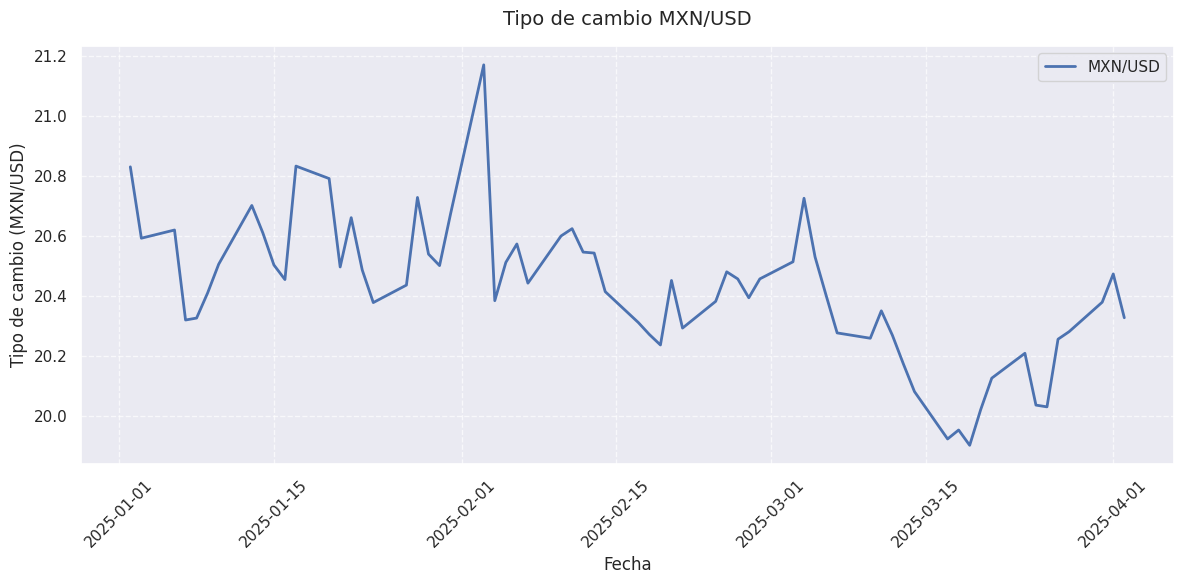


Primeros y últimos registros del período:

Primeros registros:
Ticker        MXN=X
Date               
2025-01-02  20.8302
2025-01-03  20.5929
2025-01-06  20.6201
2025-01-07  20.3208
2025-01-08  20.3273

Últimos registros:
Ticker        MXN=X
Date               
2025-03-27  20.2570
2025-03-28  20.2820
2025-03-31  20.3801
2025-04-01  20.4740
2025-04-02  20.3283


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set_theme()

# Descargar datos del tipo de cambio MXN/USD
mxn = yf.download("MXN=X",
                  start="2025-01-01",
                  end="2025-04-03",
                  progress= "T")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el precio de cierre
ax.plot(mxn.index, mxn['Close'], linewidth=2, label='MXN/USD')

# Personalizar la gráfica
ax.set_title('Tipo de cambio MXN/USD', fontsize=14, pad=15)
ax.set_xlabel('Fecha')
ax.set_ylabel('Tipo de cambio (MXN/USD)')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# Rotar las fechas para mejor visualización
plt.xticks(rotation=45)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Crear una tabla con los datos
# Seleccionar solo el precio de cierre y redondear a 4 decimales
tabla = mxn['Close'].round(4)

# Convertir el índice a formato de fecha más legible
tabla.index = tabla.index.strftime('%Y-%m-%d')

# Mostrar los primeros y últimos registros
print("\nPrimeros y últimos registros del período:")
print("\nPrimeros registros:")
print(tabla.head())
print("\nÚltimos registros:")
print(tabla.tail())

In [2]:
mxn.head()

Price,Close,High,Low,Open,Volume
Ticker,MXN=X,MXN=X,MXN=X,MXN=X,MXN=X
Date,,,,,
2025-01-02,20.830240,20.857180,20.607700,20.830240,0
2025-01-03,20.592899,20.692039,20.507999,20.592899,0
2025-01-06,20.620150,20.663380,20.242479,20.620150,0
2025-01-07,20.320801,20.390240,20.262991,20.320801,0
2025-01-08,20.327339,20.521450,20.299299,20.327339,0


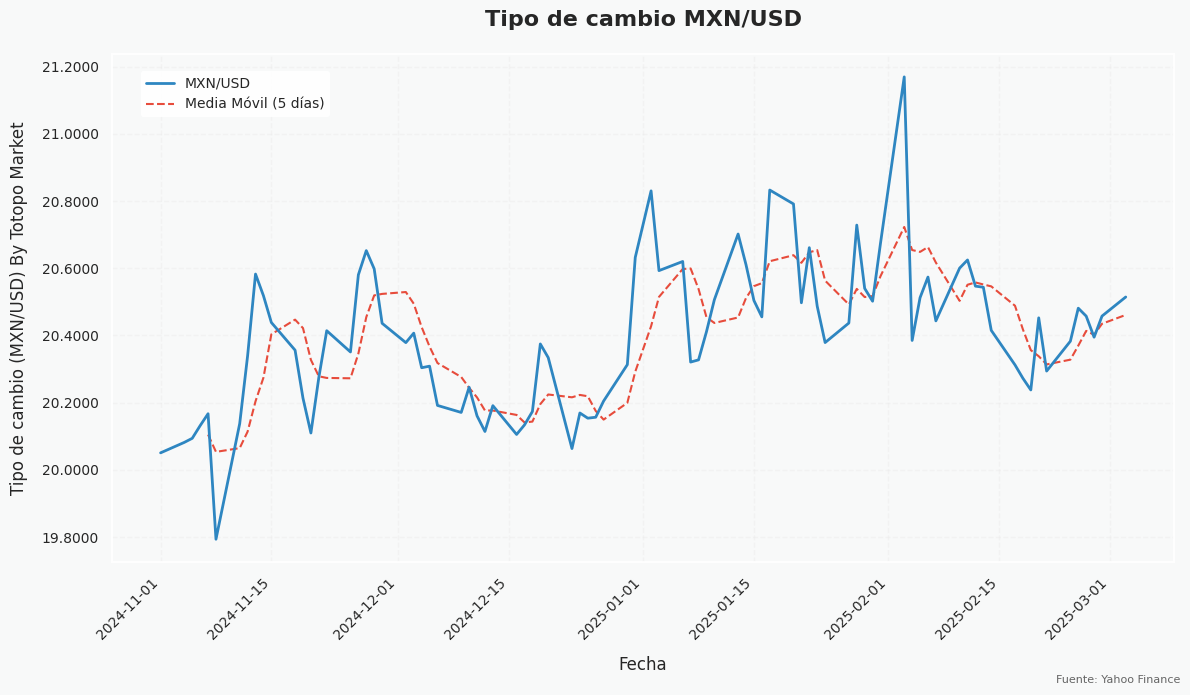

ValueError: Data must be 1-dimensional, got ndarray of shape (86, 1) instead

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np

# Configurar el estilo base
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = '#E5E5E5'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Descargar datos
mxn = yf.download("MXN=X",
                  start="2024-11-01",
                  end="2025-03-04",
                  progress=False)

# Calcular la media móvil
mxn['MA'] = mxn['Close'].rolling(window=5).mean()

# Crear la figura con un tamaño específico y DPI alto para mejor calidad
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)

# Definir colores profesionales
color_principal = '#2E86C1'  # Azul corporativo
color_media = '#E74C3C'      # Rojo suave
color_fondo = '#F8F9F9'      # Gris muy claro

# Establecer el fondo
ax.set_facecolor(color_fondo)
fig.patch.set_facecolor(color_fondo)

# Graficar los datos principales
ax.plot(mxn.index, mxn['Close'],
        linewidth=2,
        color=color_principal,
        label='MXN/USD',
        zorder=3)

# Graficar la media móvil
ax.plot(mxn.index, mxn['MA'],
        linewidth=1.5,
        color=color_media,
        linestyle='--',
        label='Media Móvil (5 días)',
        zorder=2)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.3, zorder=1)

# Formatear el eje Y para mostrar 4 decimales
def format_func(value, tick_number):
    return f'{value:.4f}'
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Añadir títulos y etiquetas con estilo
ax.set_title('Tipo de cambio MXN/USD',
             fontsize=16,
             pad=20,
             fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12, labelpad=10)
ax.set_ylabel('Tipo de cambio (MXN/USD) By Totopo Market', fontsize=12, labelpad=10)

# Personalizar los ticks
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='both', labelsize=10)

# Añadir leyenda con estilo
legend = ax.legend(loc='upper left',
                  bbox_to_anchor=(0.02, 0.98),
                  frameon=True,
                  facecolor='white',
                  edgecolor='none',
                  fontsize=10)
legend.get_frame().set_alpha(0.9)

# Añadir marca de agua o nota
plt.figtext(0.99, 0.01, 'Fuente: Yahoo Finance',
            ha='right',
            va='bottom',
            fontsize=8,
            alpha=0.7)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Crear una tabla estilizada con los datos
pd.set_option('display.float_format', lambda x: '%.4f' % x)
tabla = pd.DataFrame({
    'Cierre': mxn['Close'],
    'Media móvil': mxn['MA']
})
tabla.index = tabla.index.strftime('%Y-%m-%d')

# Mostrar estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(tabla.describe().round(4))

print("\nPrimeros y últimos registros:")
print("\nPrimeros registros:")
print(tabla.head())
print("\nÚltimos registros:")
print(tabla.tail())

In [4]:
# Crear una tabla estilizada con los datos
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Squeeze the 'Cierre' and 'Media Móvil' columns to make them 1-dimensional
tabla = pd.DataFrame({
    'Cierre': mxn['Close'].squeeze(),  # Use squeeze() to make it 1-dimensional
    'Media móvil': mxn['MA'].squeeze() # Use squeeze() to make it 1-dimensional
})
tabla.index = tabla.index.strftime('%Y-%m-%d')

# Crear una tabla estilizada con los datos
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Squeeze the 'Cierre' and 'Media Móvil' columns to make them 1-dimensional
tabla = pd.DataFrame({
    'Cierre': mxn['Close'].squeeze(),  # Use squeeze() to make it 1-dimensional
    'Media Móvil': mxn['MA'].squeeze() # Use squeeze() to make it 1-dimensional
})
tabla.index = tabla.index.strftime('%Y-%m-%d')

In [5]:
# Crear una tabla estilizada con los datos
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Squeeze the 'Cierre' and 'Media Móvil' columns to make them 1-dimensional
tabla = pd.DataFrame({
    'Cierre': mxn['Close'].squeeze(),
    'Media Móvil': mxn['MA'].squeeze()
})
tabla.index = tabla.index.strftime('%Y-%m-%d')

In [6]:
print(tabla)

            Cierre  Media Móvil
Date                           
2024-11-01 20.0507          NaN
2024-11-04 20.0818          NaN
2024-11-05 20.0939          NaN
2024-11-06 20.1316          NaN
2024-11-07 20.1670      20.1050
...            ...          ...
2025-02-25 20.4811      20.3696
2025-02-26 20.4575      20.4136
2025-02-27 20.3948      20.4021
2025-02-28 20.4576      20.4348
2025-03-03 20.5145      20.4611

[86 rows x 2 columns]


In [ ]:
mxn.describe()

Price,Close,High,Low,Open,Volume,MA
Ticker,MXN=X,MXN=X,MXN=X,MXN=X,MXN=X,
count,64.0000,64.0000,64.0000,64.0000,64.0000,60.0000
mean,20.3648,20.4916,20.2645,20.3648,0.0000,20.3681
std,0.2203,0.2264,0.2023,0.2203,0.0000,0.1724
min,19.7936,20.0771,19.7602,19.7936,0.0000,20.0536
25%,20.1705,20.2980,20.1129,20.1705,0.0000,20.2159
50%,20.3535,20.4985,20.2518,20.3535,0.0000,20.3851
75%,20.5094,20.6666,20.4287,20.5094,0.0000,20.5177
max,20.8327,20.9352,20.6913,20.8327,0.0000,20.6539


# Análisis de indice bursatil mundial



---



In [ ]:
pip install yfinance pandas matplotlib seaborn numpy

NameError: name 'ax2' is not defined

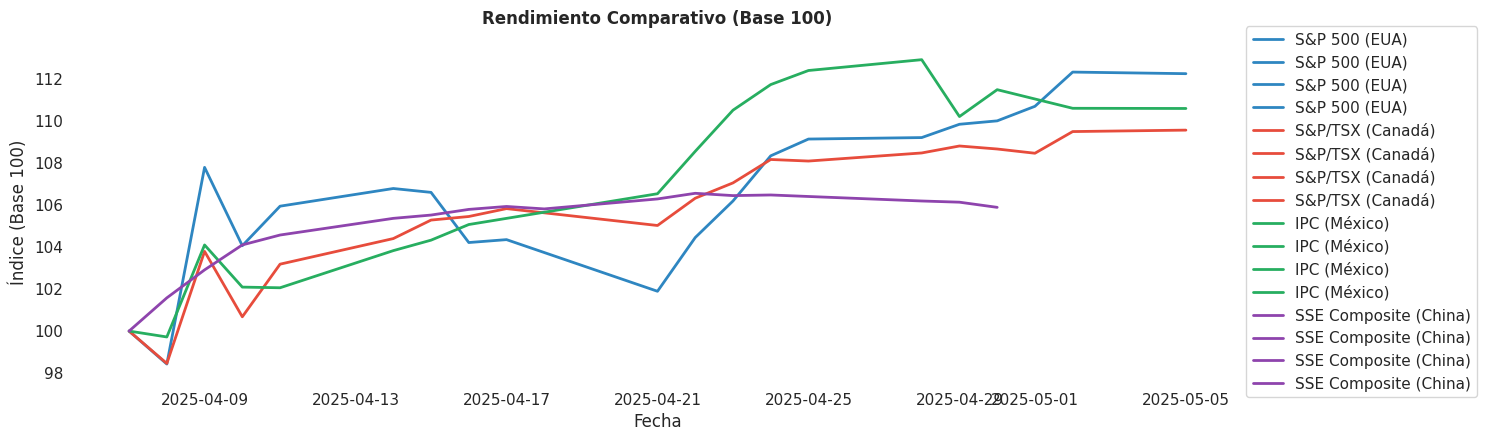

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# Configurar el estilo
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.family'] = 'sans-serif'

# Definir los índices a analizar
indices = {
    '^GSPC': 'S&P 500 (EUA)',
    '^GSPTSE': 'S&P/TSX (Canadá)',
    '^MXX': 'IPC (México)',
    '000001.SS': 'SSE Composite (China)'
}

# Obtener datos
end_date = datetime.now()
start_date = end_date - timedelta(days=30)  # Último mes

# Crear un DataFrame para almacenar todos los datos
all_data = pd.DataFrame()

# Descargar datos para cada índice
for symbol, name in indices.items():
    data = yf.download(symbol, start=start_date, end=end_date, progress=False)
    data['Return'] = data['Close'].pct_change()
    data['Market'] = name
    all_data = pd.concat([all_data, data])

# Crear la figura con subplots
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Colores para cada mercado
colors = ['#2E86C1', '#E74C3C', '#27AE60', '#8E44AD']

# 1. Gráfico de líneas para precios
ax1 = fig.add_subplot(gs[0, :])
for (symbol, name), color in zip(indices.items(), colors):
    data = all_data[all_data['Market'] == name]
    normalized_price = data['Close'] / data['Close'].iloc[0] * 100
    ax1.plot(data.index, normalized_price, label=name, linewidth=2, color=color)

ax1.set_title('Rendimiento Comparativo (Base 100)', fontsize=12, pad=15, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Índice (Base 100)')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(True, linestyle='--', alpha=0.3)

# 2. Boxplot de rendimientos
# Before calling sns.boxplot
all_data = all_data.reset_index()

# Now you can create the boxplot
sns.boxplot(data=all_data, x='Market', y='Return', palette=colors, ax=ax2)

ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=all_data, x='Market', y='Return', palette=colors, ax=ax2)
ax2.set_title('Distribución de Rendimientos Diarios', fontsize=12, pad=15, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel('Rendimiento Diario')

# 3. Tabla de estadísticas
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

# Calcular estadísticas


# Calcular estadísticas
# Calcular estadísticas
stats = []
for name in indices.values():
    market_data = all_data[all_data['Market'] == name]
    # Get the last and first closing prices to calculate the total return
    last_price = market_data['Close'].iloc[-1]
    first_price = market_data['Close'].iloc[0]
    # Calculate the total return as a percentage
    total_return = (last_price / first_price - 1) * 100
    volatility = market_data['Return'].std() * np.sqrt(252) * 100
    stats.append({
        'Mercado': name,
        # Apply formatting to the calculated total return value after converting it to a float
        'Rendimiento Total (%)': f'{float(total_return):.2f}',
        'Volatilidad Anual (%)': f'{volatility:.2f}'
    })


stats_df = pd.DataFrame(stats)
table_text = []
for col in stats_df.columns:
    table_text.append([col] + stats_df[col].tolist())

table = ax3.table(cellText=list(map(list, zip(*table_text))),
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

# Imprimir estadísticas detalladas
print("\nEstadísticas Detalladas por Mercado:")
for name in indices.values():
    market_data = all_data[all_data['Market'] == name]
    print(f"\n{name}:")
    print(f"Último Precio: {market_data['Close'].iloc[-1]:.2f}")
    print(f"Máximo del Período: {market_data['High'].max():.2f}")
    print(f"Mínimo del Período: {market_data['Low'].min():.2f}")
    print(f"Volumen Promedio: {market_data['Volume'].mean():.0f}")
    print(f"Volatilidad Diaria: {market_data['Return'].std()*100:.2f}%")

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# ... (rest of your code) ...

# Calcular estadísticas
stats = []
for name in indices.values():
    market_data = all_data[all_data['Market'] == name]
    # Get the last and first closing prices to calculate the total return
    last_price = market_data['Close'].iloc[-1]
    first_price = market_data['Close'].iloc[0]
    # Calculate the total return as a percentage
    total_return = (last_price / first_price - 1) * 100
    volatility = market_data['Return'].std() * np.sqrt(252) * 100
    stats.append({
        'Mercado': name,
        # Apply formatting to the calculated total return value
        'Rendimiento Total (%)': f'{total_return:.2f}',
        'Volatilidad Anual (%)': f'{volatility:.2f}'
    })

# ... (rest of your code) ...

In [ ]:
# Before calling sns.boxplot
all_data = all_data.reset_index()

# Now you can create the boxplot
sns.boxplot(data=all_data, x='Market', y='Return', palette=colors, ax=ax2)

In [ ]:
# Before calling sns.boxplot
all_data = all_data.reset_index()

# Now you can create the boxplot
sns.boxplot(data=all_data, x='Market', y='Return', palette=colors, ax=ax2)

<ipython-input-14-58bbcf857dd6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Market', y='Return', palette=colors, ax=ax2)


<Axes: xlabel='Market', ylabel='Return'>

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


TypeError: only length-1 arrays can be converted to Python scalars

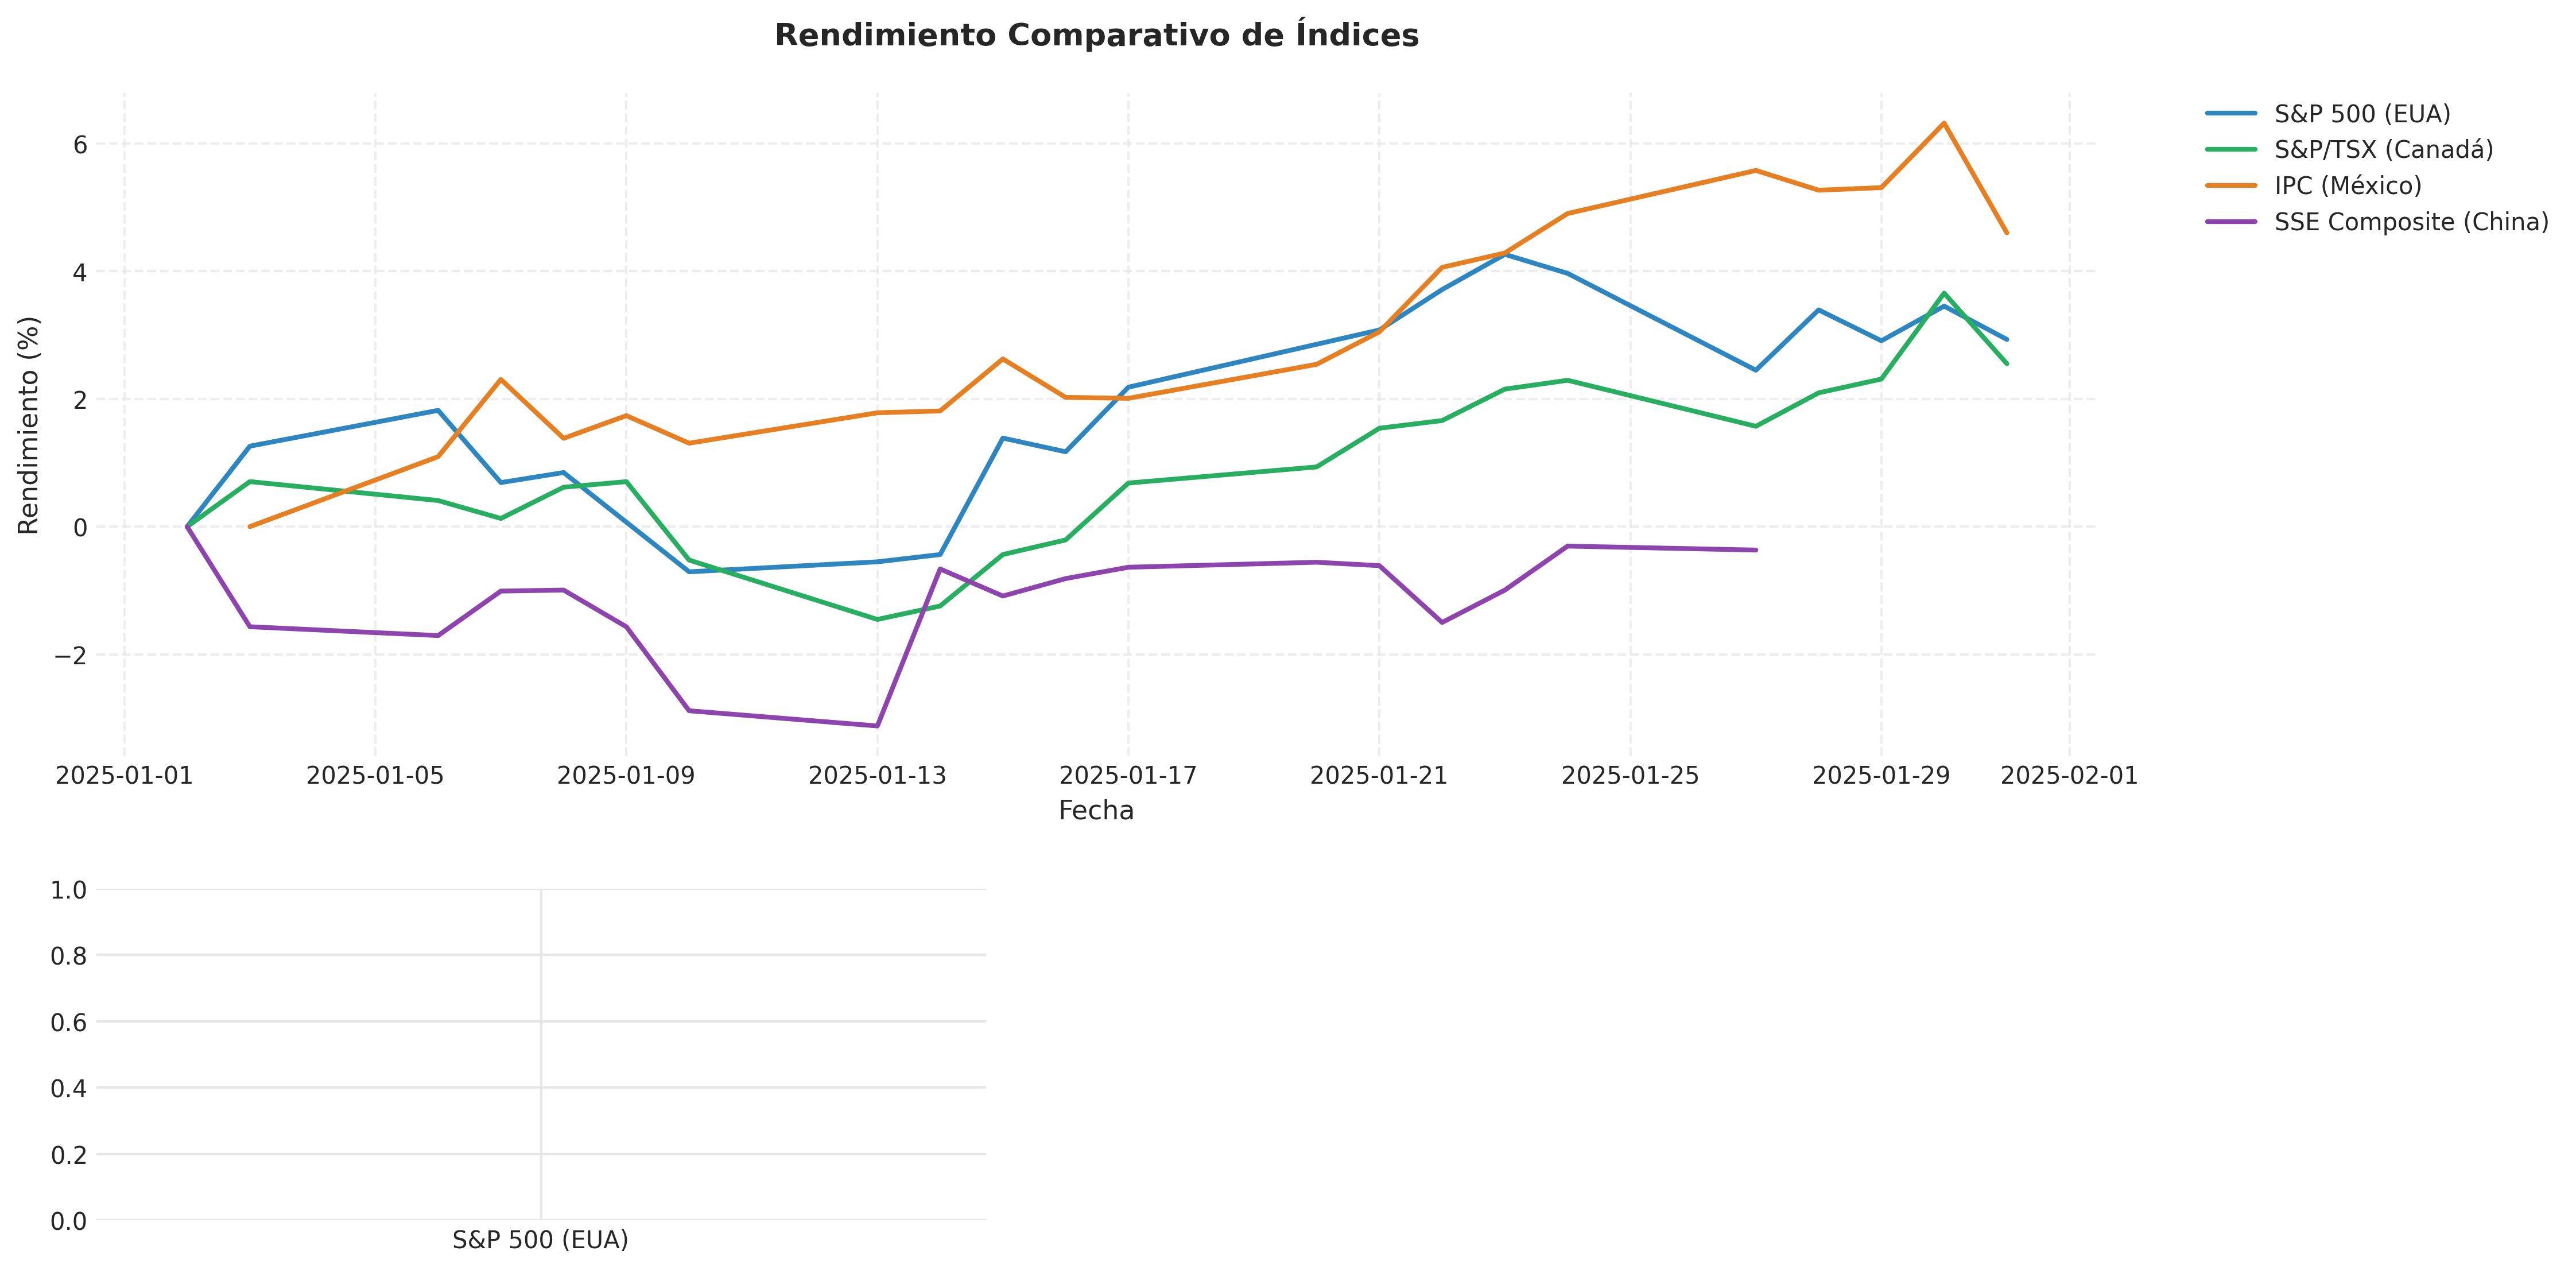

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from matplotlib.gridspec import GridSpec

# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': '.9'})
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.title_fontsize': 11
})

# Definir los índices con sus símbolos y nombres completos
indices = {
    '^GSPC': 'S&P 500 (EUA)',
    '^GSPTSE': 'S&P/TSX (Canadá)',
    '^MXX': 'IPC (México)',
    '000001.SS': 'SSE Composite (China)'
}

# Colores profesionales
colors = {
    'S&P 500 (EUA)': '#2E86C1',      # Azul corporativo
    'S&P/TSX (Canadá)': '#27AE60',    # Verde esmeralda
    'IPC (México)': '#E67E22',        # Naranja
    'SSE Composite (China)': '#8E44AD' # Púrpura
}

def format_percentage(value):
    """Función para formatear valores porcentuales"""
    return f"{value:,.2f}%"

def calculate_statistics(data):
    """Calcula estadísticas clave para cada índice"""
    initial_price = data['Close'].iloc[0]
    final_price = data['Close'].iloc[-1]
    total_return = ((final_price / initial_price) - 1) * 100
    daily_returns = data['Close'].pct_change()
    volatility = daily_returns.std() * np.sqrt(252) * 100
    max_drawdown = ((data['Close'] / data['Close'].expanding(min_periods=1).max()) - 1).min() * 100

    return {
        'Rendimiento': total_return,
        'Volatilidad': volatility,
        'Drawdown Máximo': max_drawdown
    }

# Obtener datos
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
market_data = {}

for symbol, name in indices.items():
    try:
        data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if not data.empty:
            market_data[name] = data
    except Exception as e:
        print(f"Error al obtener datos para {name}: {e}")

# Crear figura con mayor resolución
fig = plt.figure(figsize=(15, 12), dpi=300)
gs = GridSpec(3, 2, figure=fig, height_ratios=[2, 1, 1], hspace=0.3, wspace=0.25)

# 1. Gráfico de rendimientos normalizados
ax1 = fig.add_subplot(gs[0, :])
for name, data in market_data.items():
    normalized = (data['Close'] / data['Close'].iloc[0] - 1) * 100
    ax1.plot(data.index, normalized, label=name, color=colors[name], linewidth=2)

ax1.set_title('Rendimiento Comparativo de Índices', pad=20, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Rendimiento (%)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 2. Gráfico de volatilidad
ax2 = fig.add_subplot(gs[1, 0])
volatilities = []
names = []
for name, data in market_data.items():
    returns = data['Close'].pct_change().dropna()
    volatilities.append(returns.std() * np.sqrt(252) * 100)
    names.append(name)

bars = ax2.bar(names, volatilities)
for i, bar in enumerate(bars):
    bar.set_color(colors[names[i]])
ax2.set_title('Volatilidad Anualizada', pad=15, fontweight='bold')
ax2.set_ylabel('Volatilidad (%)')
ax2.tick_params(axis='x', rotation=45, ha='right')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 3. Tabla de estadísticas
ax3 = fig.add_subplot(gs[1:, 1])
ax3.axis('off')

# Preparar datos para la tabla
stats_data = []
headers = ['Índice', 'Rendimiento', 'Volatilidad', 'Drawdown Máx.']
for name, data in market_data.items():
    stats = calculate_statistics(data)
    stats_data.append([
        name,
        format_percentage(stats['Rendimiento']),
        format_percentage(stats['Volatilidad']),
        format_percentage(stats['Drawdown Máximo'])
    ])

# Crear tabla
table = ax3.table(
    cellText=stats_data,
    colLabels=headers,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2']*len(headers),
    colWidths=[0.3, 0.2, 0.2, 0.2]
)

# Estilizar tabla
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Ajustar células de la tabla
for cell in table._cells:
    table._cells[cell].set_edgecolor('#d4d4d4')
    if cell[0] == 0:  # Encabezados
        table._cells[cell].set_text_props(weight='bold')
        table._cells[cell].set_facecolor('#f2f2f2')
    else:
        table._cells[cell].set_facecolor('white')

plt.tight_layout()

# Añadir marca de agua
plt.figtext(0.99, 0.01, 'Fuente: Yahoo Finance',
            ha='right', va='bottom',
            fontsize=8, alpha=0.7)

# Mostrar la figura
plt.show()

# Imprimir estadísticas adicionales
print("\nEstadísticas Detalladas por Mercado:")
for name, data in market_data.items():
    stats = calculate_statistics(data)
    print(f"\n{name}:")
    print(f"Último Precio: {data['Close'].iloc[-1]:,.2f}")
    print(f"Rendimiento del Período: {stats['Rendimiento']:,.2f}%")
    print(f"Volatilidad Anualizada: {stats['Volatilidad']:,.2f}%")
    print(f"Drawdown Máximo: {stats['Drawdown Máximo']:,.2f}%")
    print(f"Volumen Promedio: {data['Volume'].mean():,.0f}")

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# Configurar el estilo
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.family'] = 'sans-serif'

# Definir los índices a analizar
indices = {
    '^GSPC': 'S&P 500 (EUA)',
    '^GSPTSE': 'S&P/TSX (Canadá)',
    '^MXX': 'IPC (México)',
    '000001.SS': 'SSE Composite (China)'
}

# Obtener datos
end_date = datetime.now()
start_date = end_date - timedelta(days=30)  # Último mes

# Crear un DataFrame para almacenar todos los datos
all_data = pd.DataFrame()

# Descargar datos para cada índice
for symbol, name in indices.items():
    data = yf.download(symbol, start=start_date, end=end_date, progress=False)
    data['Return'] = data['Close'].pct_change()
    data['Market'] = name
    all_data = pd.concat([all_data, data])

# Crear la figura con subplots
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Colores para cada mercado
colors = ['#2E86C1', '#E74C3C', '#27AE60', '#8E44AD']

# 1. Gráfico de líneas para precios
ax1 = fig.add_subplot(gs[0, :])
for (symbol, name), color in zip(indices.items(), colors):
    data = all_data[all_data['Market'] == name]
    normalized_price = data['Close'] / data['Close'].iloc[0] * 100
    ax1.plot(data.index, normalized_price, label=name, linewidth=2, color=color)

ax1.set_title('Rendimiento Comparativo (Base 100)', fontsize=12, pad=15, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Índice (Base 100)')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(True, linestyle='--', alpha=0.3)

# 2. Boxplot de rendimientos
ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=all_data, x='Market', y='Return', palette=colors, ax=ax2)
ax2.set_title('Distribución de Rendimientos Diarios', fontsize=12, pad=15, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel('Rendimiento Diario')

# 3. Tabla de estadísticas
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

# Calcular estadísticas
stats = []
for name in indices.values():
    market_data = all_data[all_data['Market'] == name]
    total_return = (market_data['Close'].iloc[-1] / market_data['Close'].iloc[0] - 1) * 100
    volatility = market_data['Return'].std() * np.sqrt(252) * 100
    stats.append({
        'Mercado': name,
        'Rendimiento Total (%)': f'{total_return:.2f}',
        'Volatilidad Anual (%)': f'{volatility:.2f}'
    })

stats_df = pd.DataFrame(stats)
table_text = []
for col in stats_df.columns:
    table_text.append([col] + stats_df[col].tolist())

table = ax3.table(cellText=list(map(list, zip(*table_text))),
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

# Imprimir estadísticas detalladas
print("\nEstadísticas Detalladas por Mercado:")
for name in indices.values():
    market_data = all_data[all_data['Market'] == name]
    print(f"\n{name}:")
    print(f"Último Precio: {market_data['Close'].iloc[-1]:.2f}")
    print(f"Máximo del Período: {market_data['High'].max():.2f}")
    print(f"Mínimo del Período: {market_data['Low'].min():.2f}")
    print(f"Volumen Promedio: {market_data['Volume'].mean():.0f}")
    print(f"Volatilidad Diaria: {market_data['Return'].std()*100:.2f}%")

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<ipython-input-9-1b7bc78d9e91>:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vol = float(returns.std() * np.sqrt(252) * 100)  # Convertir a float escalar
<ipython-input-9-1b7bc78d9e91>:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vol = float(returns.std() * np.sqrt(252) * 100)  # Convertir a float escalar
<ipython-input-9-1b7bc78d9e91>:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vol = float(returns.std() * np.sqrt(252) * 100)  # Convertir a float escalar
<ipython-input-9-1b7bc78d9e91>:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vol = float(returns.std() * np.sqrt(252) * 100)  

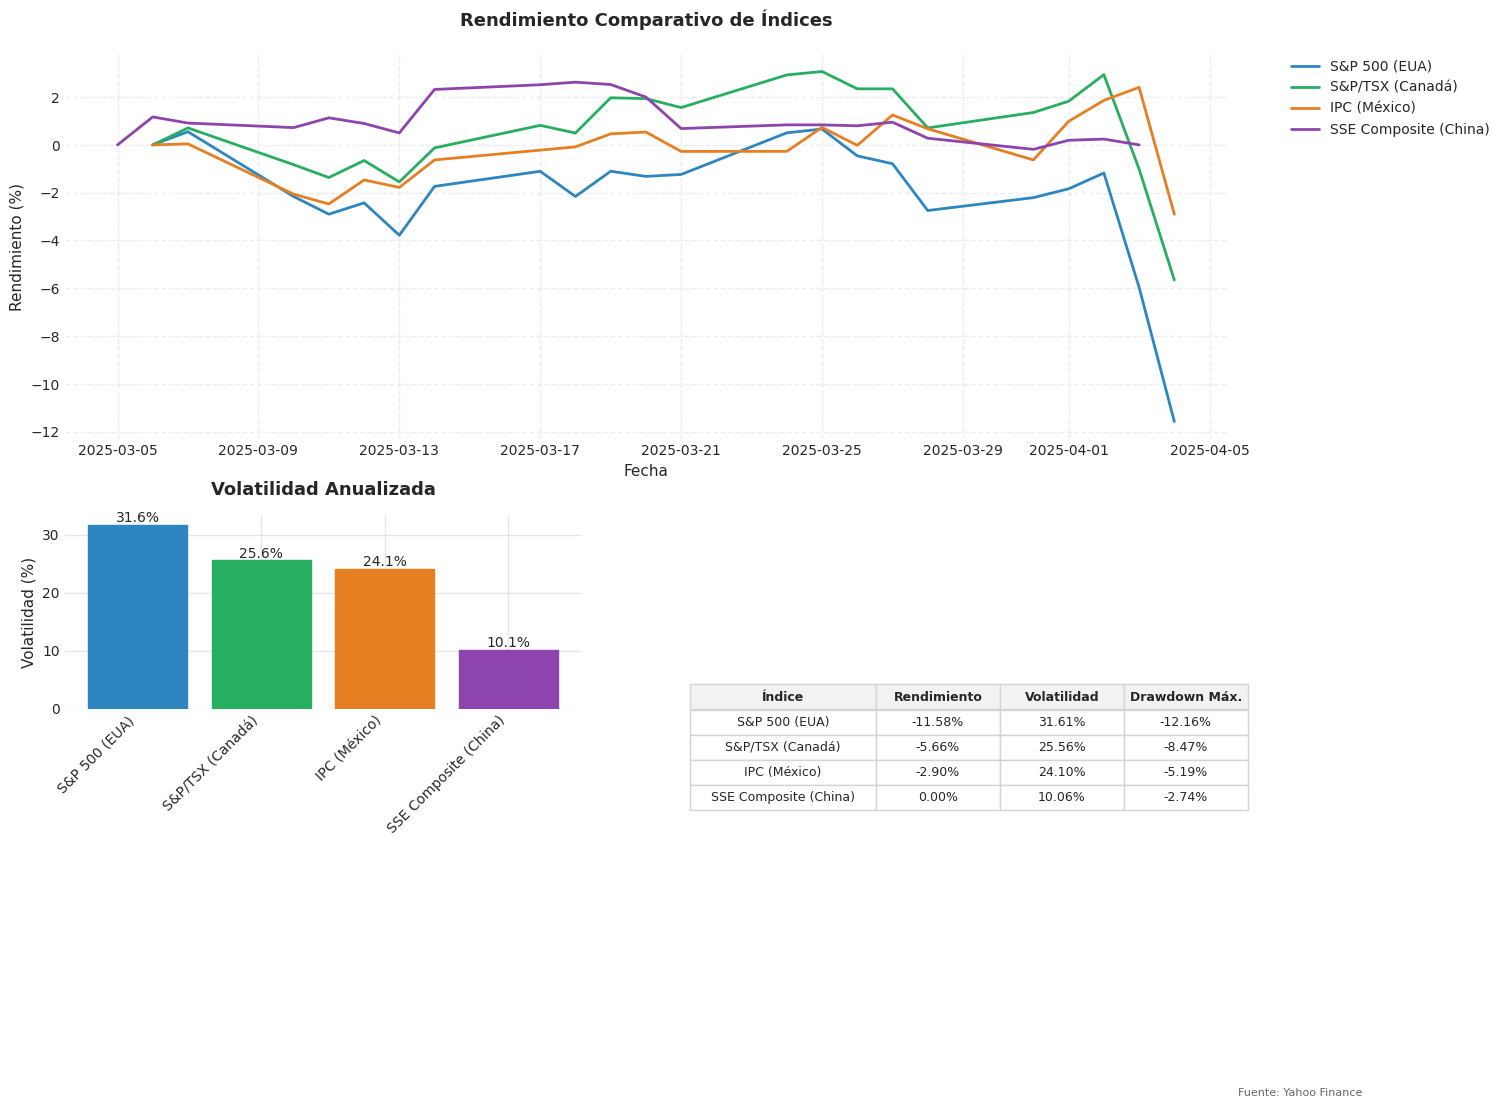


Estadísticas Detalladas por Mercado:

S&P 500 (EUA):
Último Precio: 5,074.08
Rendimiento del Período: -11.58%
Volatilidad Anualizada: 31.61%
Drawdown Máximo: -12.16%
Volumen Promedio: 5,285,956,090

S&P/TSX (Canadá):
Último Precio: 23,193.47
Rendimiento del Período: -5.66%
Volatilidad Anualizada: 25.56%
Drawdown Máximo: -8.47%
Volumen Promedio: 305,907,068

IPC (México):
Último Precio: 51,284.06
Rendimiento del Período: -2.90%
Volatilidad Anualizada: 24.10%
Drawdown Máximo: -5.19%
Volumen Promedio: 223,559,783

SSE Composite (China):
Último Precio: 3,342.01
Rendimiento del Período: 0.00%
Volatilidad Anualizada: 10.06%
Drawdown Máximo: -2.74%
Volumen Promedio: 467,090


<ipython-input-9-1b7bc78d9e91>:55: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Rendimiento': float(total_return),
<ipython-input-9-1b7bc78d9e91>:56: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Volatilidad': float(volatility),
<ipython-input-9-1b7bc78d9e91>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Drawdown Máximo': float(max_drawdown)
<ipython-input-9-1b7bc78d9e91>:171: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Último Precio: {float(data['Close'].iloc[-1]):,.2f}")
<ipython-input-9-1b7bc78d9e91>:175: FutureWarning: Calling int on a single element Series is deprecated and 

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from matplotlib.gridspec import GridSpec

# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': '.9'})
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.title_fontsize': 11
})

# Definir los índices
indices = {
    '^GSPC': 'S&P 500 (EUA)',
    '^GSPTSE': 'S&P/TSX (Canadá)',
    '^MXX': 'IPC (México)',
    '000001.SS': 'SSE Composite (China)'
}

# Colores profesionales
colors = {
    'S&P 500 (EUA)': '#2E86C1',
    'S&P/TSX (Canadá)': '#27AE60',
    'IPC (México)': '#E67E22',
    'SSE Composite (China)': '#8E44AD'
}

def calculate_statistics(data):
    """Calcula estadísticas clave para cada índice"""
    initial_price = data['Close'].iloc[0]
    final_price = data['Close'].iloc[-1]
    total_return = ((final_price / initial_price) - 1) * 100
    daily_returns = data['Close'].pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252) * 100

    # Calcular drawdown
    rolling_max = data['Close'].expanding().max()
    drawdown = ((data['Close'] - rolling_max) / rolling_max) * 100
    max_drawdown = drawdown.min()

    return {
        'Rendimiento': float(total_return),
        'Volatilidad': float(volatility),
        'Drawdown Máximo': float(max_drawdown)
    }

# Obtener datos
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
market_data = {}

for symbol, name in indices.items():
    try:
        data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if not data.empty:
            market_data[name] = data
    except Exception as e:
        print(f"Error al obtener datos para {name}: {e}")

# Crear figura
fig = plt.figure(figsize=(15, 12), dpi=100)
gs = GridSpec(3, 2, figure=fig, height_ratios=[2, 1, 1], hspace=0.3, wspace=0.25)

# 1. Gráfico de rendimientos normalizados
ax1 = fig.add_subplot(gs[0, :])
for name, data in market_data.items():
    normalized = (data['Close'] / data['Close'].iloc[0] - 1) * 100
    ax1.plot(data.index, normalized, label=name, color=colors[name], linewidth=2)

ax1.set_title('Rendimiento Comparativo de Índices', pad=20, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Rendimiento (%)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 2. Gráfico de volatilidad
ax2 = fig.add_subplot(gs[1, 0])
volatilities = []
names = []

for name, data in market_data.items():
    returns = data['Close'].pct_change().dropna()
    vol = float(returns.std() * np.sqrt(252) * 100)  # Convertir a float escalar
    volatilities.append(vol)
    names.append(name)

bars = ax2.bar(range(len(names)), volatilities)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels(names, rotation=45, ha='right')

for i, bar in enumerate(bars):
    bar.set_color(colors[names[i]])
    ax2.text(i, bar.get_height(), f'{volatilities[i]:.1f}%',
             ha='center', va='bottom')

ax2.set_title('Volatilidad Anualizada', pad=15, fontweight='bold')
ax2.set_ylabel('Volatilidad (%)')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 3. Tabla de estadísticas
ax3 = fig.add_subplot(gs[1:, 1])
ax3.axis('off')

# Preparar datos para la tabla
stats_data = []
headers = ['Índice', 'Rendimiento', 'Volatilidad', 'Drawdown Máx.']

for name, data in market_data.items():
    stats = calculate_statistics(data)
    stats_data.append([
        name,
        f"{stats['Rendimiento']:.2f}%",
        f"{stats['Volatilidad']:.2f}%",
        f"{stats['Drawdown Máximo']:.2f}%"
    ])

# Crear tabla
table = ax3.table(
    cellText=stats_data,
    colLabels=headers,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2']*len(headers),
    colWidths=[0.3, 0.2, 0.2, 0.2]
)

# Estilizar tabla
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

for cell in table._cells:
    table._cells[cell].set_edgecolor('#d4d4d4')
    if cell[0] == 0:
        table._cells[cell].set_text_props(weight='bold')
        table._cells[cell].set_facecolor('#f2f2f2')
    else:
        table._cells[cell].set_facecolor('white')

plt.tight_layout()

# Añadir marca de agua
plt.figtext(0.99, 0.01, 'Fuente: Yahoo Finance',
            ha='right', va='bottom',
            fontsize=8, alpha=0.7)

# Mostrar la figura
plt.show()

# Imprimir estadísticas adicionales
print("\nEstadísticas Detalladas por Mercado:")
for name, data in market_data.items():
    stats = calculate_statistics(data)
    print(f"\n{name}:")
    print(f"Último Precio: {float(data['Close'].iloc[-1]):,.2f}")
    print(f"Rendimiento del Período: {stats['Rendimiento']:,.2f}%")
    print(f"Volatilidad Anualizada: {stats['Volatilidad']:,.2f}%")
    print(f"Drawdown Máximo: {stats['Drawdown Máximo']:,.2f}%")
    print(f"Volumen Promedio: {int(data['Volume'].mean()):,}")